<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#b28bb7; border:0; color:black'><center>INDEX</center></h1>



- Import Libraries
- Import Data
- Data Visualization
- Data Preprocessing
- Train-Test Data
- Model Building
- Conclusion

<a id="1"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>IMPORT LIBRARIES</center></h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-buyers/test data credit card.csv
/kaggle/input/credit-card-buyers/train data credit card.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline


<a id="2"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>LOADING DATA</center></h1>

In [3]:
train = pd.read_csv("/kaggle/input/credit-card-buyers/train data credit card.csv")
test = pd.read_csv('/kaggle/input/credit-card-buyers/test data credit card.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<a id="3"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>DATA VISUALIZATION</center></h1>

<AxesSubplot:xlabel='Is_Active', ylabel='Is_Lead'>

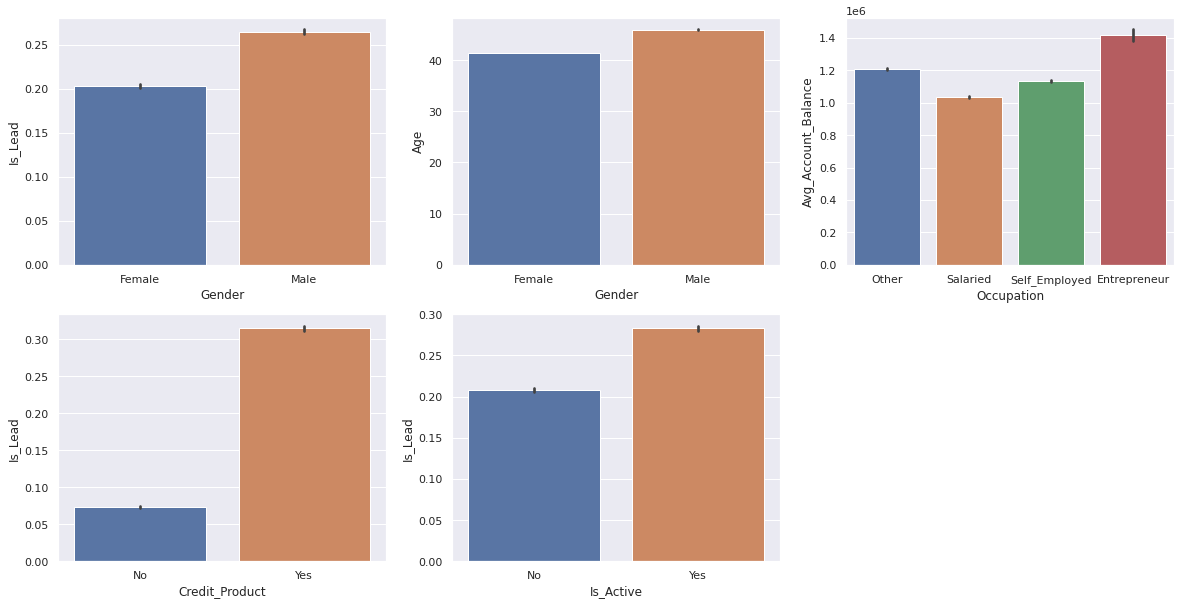

In [4]:
plt.subplots(figsize=(20,10))



plt.subplot(231)
sns.barplot(x = 'Gender',y = 'Is_Lead',data = train)

plt.subplot(232)
sns.barplot(x = 'Gender',y = 'Age',data = train)

plt.subplot(233)
sns.barplot(x = 'Occupation',y = 'Avg_Account_Balance',data = train)

plt.subplot(234)
sns.barplot(x = 'Credit_Product',y = 'Is_Lead',data = train)

plt.subplot(235)
sns.barplot(x = 'Is_Active',y = 'Is_Lead',data = train)

- from above visualization,
- from 1st barplot, males are more in count who are purchasing credit card as compared to females.
- From 2nd barplot, in the data average age of males are more than females.
- from 3rd barplot, According to occupation person who is entrepreneur that person is having more avg account balance.
- from 4th barplot, person who is having previsouly any type of loan that person having chance of buying credit card.
- final bar clearly metions, there no importance whether person active or not in both the cases person will buy credit card, but data showing credit card had been buying more if person is active.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
# Check NAN Values
for i in train.columns:
    print (i+": "+str(train[i].isna().sum()))

ID: 0
Gender: 0
Age: 0
Region_Code: 0
Occupation: 0
Channel_Code: 0
Vintage: 0
Credit_Product: 29325
Avg_Account_Balance: 0
Is_Active: 0
Is_Lead: 0


In [7]:
# as you see there is NAN values are present, particularly this is categorical feature in this case you can replace NAN values as missing values.
# But as we just analysing, lets check if we drop NAN values then how it will perform.
train['Credit_Product'] = train['Credit_Product'].dropna(axis = 0)


In [8]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

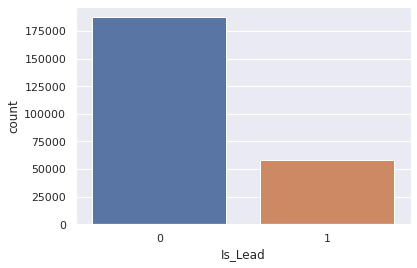

In [9]:
# Data is imbalanced, let used imbalance library from sklearn, and as you can see person who is buying credit card having less number of data 
# Either we can perform undersampling or oversampling, in this model we will try with undersampling lets check how it will perform.
sns.countplot(x = 'Is_Lead',data = train)

In [10]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

<a id="4"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>DATA PREPROCESSING</center></h1>

In [11]:
#There are some categorical features are present, accordingly we can use nominal encoding or else we can use ordinal encoding.
# I am using ordinal encoding on occupation and on other feature im going to use nominal encoding.
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler
label = LabelEncoder()

train['Occupation'] = label.fit_transform(train['Occupation'])

train['Gender'] = pd.get_dummies(train['Gender'],drop_first = True)
train['Is_Active'] = pd.get_dummies(train['Is_Active'],drop_first = True)
train['Credit_Product'] = pd.get_dummies(train['Credit_Product'],drop_first = True)


In [12]:
x = train.drop(['Is_Lead','ID','Region_Code','Channel_Code'],axis = True)
y = train.loc[:,['Is_Lead']]
x

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,1,43,0,1045696,0
1,0,30,2,32,0,581988,0
2,0,56,3,26,0,1484315,1
3,1,34,2,19,0,470454,0
4,0,30,2,33,0,886787,0
...,...,...,...,...,...,...,...
245720,1,51,3,109,0,1925586,0
245721,1,27,2,15,0,862952,1
245722,0,26,2,13,0,670659,0
245723,0,28,2,31,0,407504,0


In [13]:
## Get the Fraud and the normal dataset 

interested= train[train['Is_Lead']==1]

not_interested = train[train['Is_Lead']==0]

In [14]:
print(interested.shape,not_interested.shape)

(58288, 11) (187437, 11)


In [15]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(x,y)


In [16]:
X_res

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,49,3,99,0,4022185,1
1,0,30,2,31,0,2521592,0
2,0,30,2,31,0,2521592,0
3,0,30,2,31,0,2521592,0
4,0,49,3,93,0,2433144,0
...,...,...,...,...,...,...,...
116571,1,43,2,50,0,551203,1
116572,1,53,1,19,0,1141825,1
116573,1,36,3,15,1,608110,1
116574,0,41,3,13,1,898170,1


In [17]:
y_res.value_counts()

Is_Lead
0          58288
1          58288
dtype: int64

In [18]:
final_data = pd.merge(X_res,y_res,left_index = True,right_index = True)
X_res.shape,y_res.shape

((116576, 7), (116576, 1))

<AxesSubplot:ylabel='Avg_Account_Balance'>

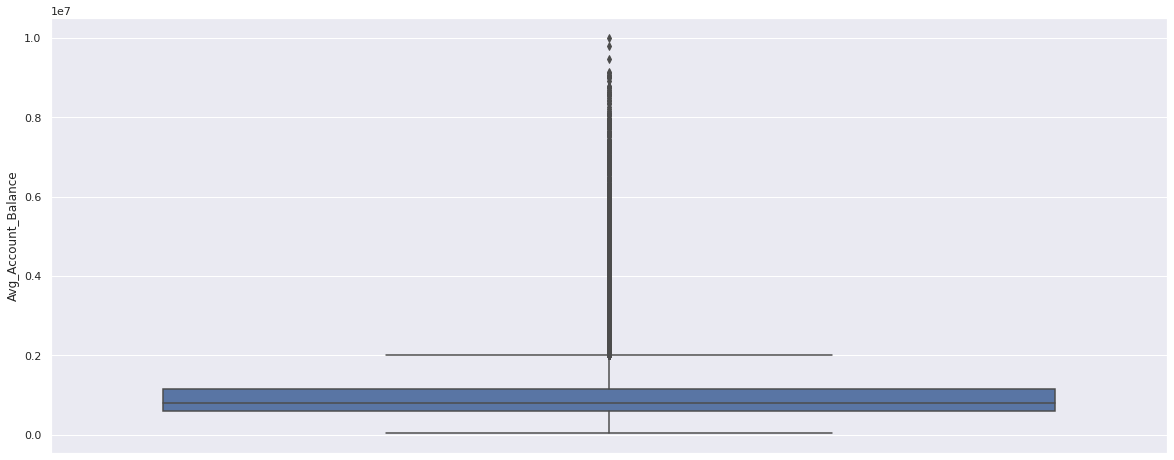

In [19]:
# most of the variable is normal, means it does not having outliers but  as checked one parameter is having most of the outliers. either you can remove outliers and perform separate algorithm for outliers.
plt.figure(figsize = (20,8))
sns.boxplot(y='Avg_Account_Balance',data = final_data)

In [20]:
final_data

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,49,3,99,0,4022185,1,0
1,0,30,2,31,0,2521592,0,0
2,0,30,2,31,0,2521592,0,0
3,0,30,2,31,0,2521592,0,0
4,0,49,3,93,0,2433144,0,0
...,...,...,...,...,...,...,...,...
116571,1,43,2,50,0,551203,1,1
116572,1,53,1,19,0,1141825,1,1
116573,1,36,3,15,1,608110,1,1
116574,0,41,3,13,1,898170,1,1


In [21]:
Q1 = final_data['Avg_Account_Balance'].quantile(0.25)
Q3 = final_data['Avg_Account_Balance'].quantile(0.75)
IQR = Q3 - Q1

filter = (final_data['Avg_Account_Balance'] >= Q1 - 1.5 * IQR) & (final_data['Avg_Account_Balance']<= Q3 + 1.5 *IQR)
train2 = final_data.loc[filter]  
print("data loss percentage {}%".format(((len(final_data) - len(train2))/len(final_data))*100))

data loss percentage 6.595697227559703%


<AxesSubplot:>

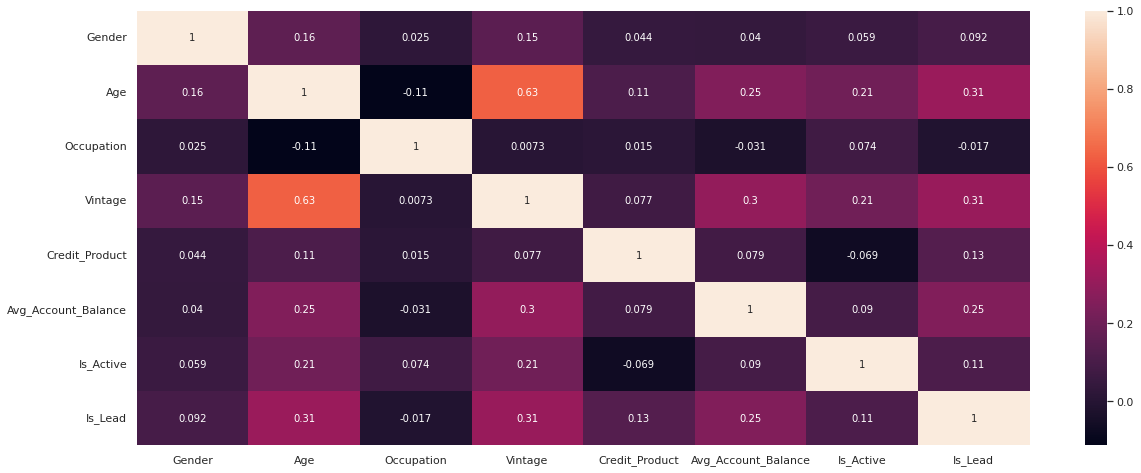

In [22]:
# Check data is correlated with each other, if features are correlated then you can drop that feature, but check wether that feature are using for same purpose.
# from below graph,there is paramter which is showing correlation more than 0.5 that means these are correlated  but as you can see one feature is age and another one is vintage and both is used for differnet purpose.
correlation = train2.corr()
plt.figure(figsize = (20,8))
sns.heatmap(correlation,annot = True,cmap = 'rocket')

In [23]:
train2.head()

,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
19,0,46,3,75,0,1611273,1,0
29,1,44,3,79,1,1611273,0,0
30,0,46,3,97,1,1248776,1,0
32,0,55,3,105,1,1940013,1,0
33,1,47,1,91,0,1248776,0,0


In [24]:
# Assigning dependent and independent values.
x = train2.iloc[:,:-1]

y = train2.iloc[:,-1]

In [25]:
from sklearn.preprocessing import StandardScaler


std = StandardScaler()

x_std = std.fit_transform(x)

<a id="5"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>TRAIN-TEST DATA</center></h1>

In [26]:
from sklearn.model_selection import train_test_split

#Split data into Train and test format
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size = 0.20,random_state =42)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test:{}'.format(x_test.shape))

Shape of Training Xs:(87109, 7)
shape of Test:(21778, 7)


In [27]:
#y_train = np.array(y_train).astype(int)
#y_test= np.array(y_test).astype(int)

<a id="6"></a>
<h1 style='background:#b28bb7; border:0; color:black'><center>MODEL BUILDING</center></h1>

In [28]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test,y_test)
print(score)

0.7168702360179998


In [29]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[8667, 2971],
       [3195, 6945]])

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_predicted = ada.predict(x_test)
score = ada.score(x_test,y_test)
print(score)

0.7071356414730462


In [31]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[8561, 3077],
       [3301, 6839]])

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier()
gradient.fit(x_train,y_train)
y_predicted = gradient.predict(x_test)
score = gradient.score(x_test,y_test)
print(score)

0.7208650932133346



- You can see gradient boosting model performing well, as compared to other model, also if you used hyperparameter then it will provide you greater accuracy.

**<span style="color:#65634a;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#65634a;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:#65634a;">Best Wishes!</span>**
